# PRÁCTICA 2.1 - VÍCTOR CHOZA MERINO - ADRIÁN TURIEL CHARRO

## 1. Regresión logística

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv
import scipy.optimize as opt

In [2]:
def sigmoide(z): #g(z)
    return (1 / (1 + np.exp(-z)))

In [3]:
def hipotesis(X, Thetas):
    return sigmoide(np.matmul(X, Thetas))

In [4]:
def gradiente(Thetas, X, Y):
    H = sigmoide(np.matmul(X, Thetas))   #Hipótesis
    #Thetas -= np.matmul(H - Y,X)*(alpha/len(X))
    return np.matmul(X.T, H - Y)*(1/len(X))

In [5]:
def coste(Thetas, X, Y):
    H = sigmoide(np.matmul(X, Thetas))
    return (- 1 / (len(X))) * (np.dot(Y, np.log(H)) + np.dot((1 - Y), np.log(1 - H)))

In [6]:
def porcentaje_aprobado(X, Y, Thetas):
    H = hipotesis(X, Thetas)
    # (H >= 0.5) -> Los valores mayores de 0.5 se ponen a 1 (True)
    # y los demás a 0 (False)
    
    # (np.sum((H >= 0.5)==Y) -> Número de valores cuyo valor real es 1 y
    # su valor correspondiente a la hipótesis es 1 (True)
    return (np.sum((H >= 0.5)==Y)/len(X))*100

In [7]:
def pinta_frontera_recta(X, Y, Theta):
    plt.figure()
    X = X[:,1:np.shape(X)[1]]  # Todas las columnas menos la de unos
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

    aux = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()]
    h = sigmoide(aux.dot(Theta))
    h = h.reshape(xx1.shape)

    # Obtiene un vector con los índices de los ejemplos positivos
    pos1 = np.where(Y == 1)
    # Obtiene un vector con los índices de los ejemplos negativos
    pos2 = np.where(Y == 0)

    # Dibuja los ejemplos positivos
    plt.scatter(X[pos1, 0],X[pos1, 1],marker='+',c='k',label='Admited' )
    # Dibuja los ejemplos negativos
    plt.scatter(X[pos2, 0],X[pos2, 1],marker='o',c='g',label='Not admited'  )

    plt.legend()     # parar mostrar la leyenda
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    plt.show()
    plt.savefig("frontera.pdf")
    plt.close()

In [8]:
def regresion_logistica(datos):
    valores = read_csv(datos, header=None).to_numpy()
    X = valores[:,:-1]
    Y = valores[:,-1]

    m = np.shape(X)[0]   #Filas
    n = np.shape(X)[1]   #Columnas
         
    X = np.hstack([np.ones([m, 1]), X]) 
    
    Thetas = np.zeros(n+1)    #Thetas calculadas
    
    result = opt.fmin_tnc (func=coste , x0=Thetas , fprime=gradiente , args =(X, Y))
    Thetas = result [0]

    pinta_frontera_recta(X, Y, Thetas)
    
    return X, Y, Thetas

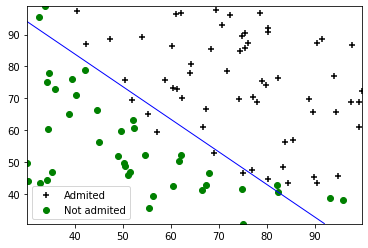

89.0 % de aprobados


In [9]:
X, Y, Thetas = regresion_logistica("ex2data1.csv")
print (porcentaje_aprobado(X, Y, Thetas), "%" " de aprobados")